In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import scipy.stats as  stats # used for the frequency(count) of label in frame_size
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.
/home/raj/anaconda3/envs/object_classify/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/raj/anaconda3/envs/object_classify/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/raj/anaconda3/envs/object_classify/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/h

In [2]:
file_name = ["20hzchippedtooth.xlsx","20hzmissingtooth.xlsx","20hznodefect.xlsx","20hzworngear.xlsx","SensorFault1.xlsx"]
dataframe = pd.read_excel(file_name[4],sheet_name =0)
dataframe.head(20)

,Unnamed: 0,X_Value,Acceleration_0_a1_x,Acceleration_1_a1_y,Acceleration_2_a1_z,Unnamed: 4
0,0,0.0000,0.020272,0.039839,0.042605,NaN
1,1,0.0002,0.016732,0.036659,0.042360,NaN
2,2,0.0004,0.016976,0.037271,0.042360,NaN
3,3,0.0006,0.015999,0.035681,0.040399,NaN
4,4,0.0008,0.015145,0.034458,0.038439,NaN
5,5,0.0010,0.015145,0.032990,0.040277,NaN
6,6,0.0012,0.012947,0.034092,0.038194,NaN
7,7,0.0014,0.010506,0.029077,0.037336,NaN
8,8,0.0016,0.012581,0.031767,0.035499,NaN
9,9,0.0018,0.016243,0.032990,0.035866,NaN


In [8]:
dataframe.shape[0]

5000

In [9]:
idx =0
new_col = 'chipp'
dataframe.insert(loc=idx, column='Activity', value=new_col)
dataframe.head()

,Activity,Unnamed: 0,X_Value,Acceleration_0_a1_x,Acceleration_1_a1_y,Acceleration_2_a1_z,Unnamed: 4
0,chipp,0,0.0000,0.020272,0.039839,0.042605,NaN
1,chipp,1,0.0002,0.016732,0.036659,0.042360,NaN
2,chipp,2,0.0004,0.016976,0.037271,0.042360,NaN
3,chipp,3,0.0006,0.015999,0.035681,0.040399,NaN
4,chipp,4,0.0008,0.015145,0.034458,0.038439,NaN


In [10]:
classes = ["chipped_tooth","missing_tooth","no_defect","worn_gear","Sensor_fault"]
file_name = ["20hzchippedtooth.xlsx","20hzmissingtooth.xlsx","20hznodefect.xlsx","20hzworngear.xlsx","SensorFault1.xlsx"]


In [11]:
sequences = list()
for file , new_col in zip(file_name,classes):
    
    
    dataset = pd.read_excel(file,sheet_name =0)
    if file =="SensorFault1.xlsx":
        dataset.drop(['Unnamed: 0'],axis =1,inplace = True)
    dataset.insert(loc=idx, column='Activity', value=new_col)
    values = dataset.values
    sequences.append(values)
sequences[0]

array([['chipped_tooth', 0, 4.957847, 3.866817, -1.659691, nan],
       ['chipped_tooth', 5e-05, 4.532636, 3.205644, -1.889678, nan],
       ['chipped_tooth', 0.0001, 4.161883, 2.596776, -1.206089, nan],
       ...,
       ['chipped_tooth', 56.89235, -3.747107, 3.492459, -1.506653, nan],
       ['chipped_tooth', 56.8924, -1.481654, -0.496798, -0.283077, nan],
       ['chipped_tooth', 56.89245, 1.884259, -4.456589, 1.052735, nan]],
      dtype=object)

In [12]:
columns = ['class','time','x_accleration','y_accleration','z_accleration','Unknown']

In [13]:
copy_data = list()

for seq in sequences:
    
    for row in seq:
        
        copy_data.append(row)

data = pd.DataFrame(data=copy_data,columns = columns)

In [14]:
data.tail()
data.drop(['Unknown'], axis = 1, inplace = True) 

In [15]:
data.dtypes

class            object
time             object
x_accleration    object
y_accleration    object
z_accleration    object
dtype: object

In [16]:
data

,class,time,x_accleration,y_accleration,z_accleration
0,chipped_tooth,0,4.95785,3.86682,-1.65969
1,chipped_tooth,5e-05,4.53264,3.20564,-1.88968
2,chipped_tooth,0.0001,4.16188,2.59678,-1.20609
3,chipped_tooth,0.00015,4.26207,2.39824,-0.973284
4,chipped_tooth,0.0002,4.08112,1.78213,-0.710336
...,...,...,...,...,...
2426191,Sensor_fault,0.999,0.03016,0.047544,0.047628
2426192,Sensor_fault,0.9992,0.028085,0.046321,0.044443
2426193,Sensor_fault,0.9994,0.027352,0.045464,0.04481
2426194,Sensor_fault,0.9996,0.025399,0.040695,0.04481


In [17]:
data['time'] = data['time'].apply(pd.to_numeric, errors='coerce')
data['x_accleration'] = data['x_accleration'].apply(pd.to_numeric, errors='coerce')
data['y_accleration'] = data['y_accleration'].apply(pd.to_numeric, errors='coerce')
data['z_accleration'] = data['z_accleration'].apply(pd.to_numeric, errors='coerce')

In [18]:
data.dtypes

class             object
time             float64
x_accleration    float64
y_accleration    float64
z_accleration    float64
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426196 entries, 0 to 2426195
Data columns (total 5 columns):
class            object
time             float64
x_accleration    float64
y_accleration    float64
z_accleration    float64
dtypes: float64(4), object(1)
memory usage: 92.6+ MB


In [20]:
data.isnull().sum()

class                0
time             13196
x_accleration     8396
y_accleration     9596
z_accleration     9596
dtype: int64

In [21]:
data.dropna(inplace=True)

In [22]:
data.isnull().all()

class            False
time             False
x_accleration    False
y_accleration    False
z_accleration    False
dtype: bool

In [23]:
data['class'].value_counts()

worn_gear        602000
missing_tooth    602000
chipped_tooth    602000
no_defect        602000
Sensor_fault       5000
Name: class, dtype: int64

In [24]:
fs =10
classes_name = data['class'].value_counts().index
classes_name

Index(['worn_gear', 'missing_tooth', 'chipped_tooth', 'no_defect',
       'Sensor_fault'],
      dtype='object')

In [25]:
data.tail()

,class,time,x_accleration,y_accleration,z_accleration
2426191,Sensor_fault,0.9990,0.030160,0.047544,0.047628
2426192,Sensor_fault,0.9992,0.028085,0.046321,0.044443
2426193,Sensor_fault,0.9994,0.027352,0.045464,0.044810
2426194,Sensor_fault,0.9996,0.025399,0.040695,0.044810
2426195,Sensor_fault,0.9998,0.024911,0.046199,0.047628


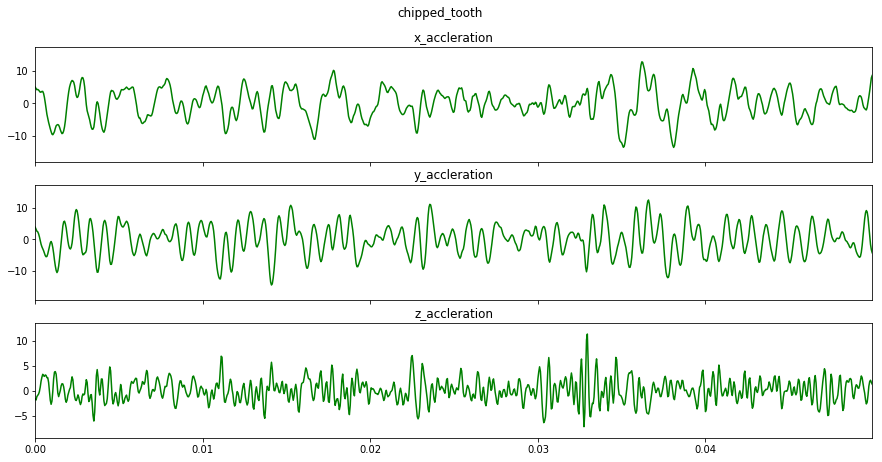

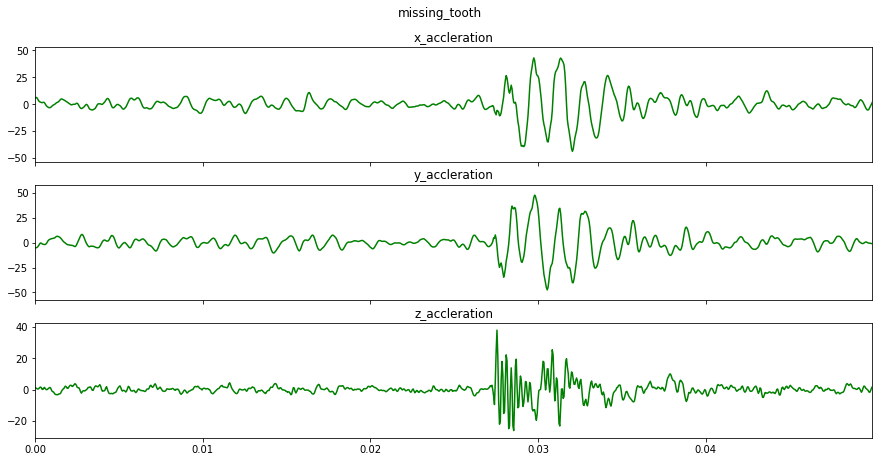

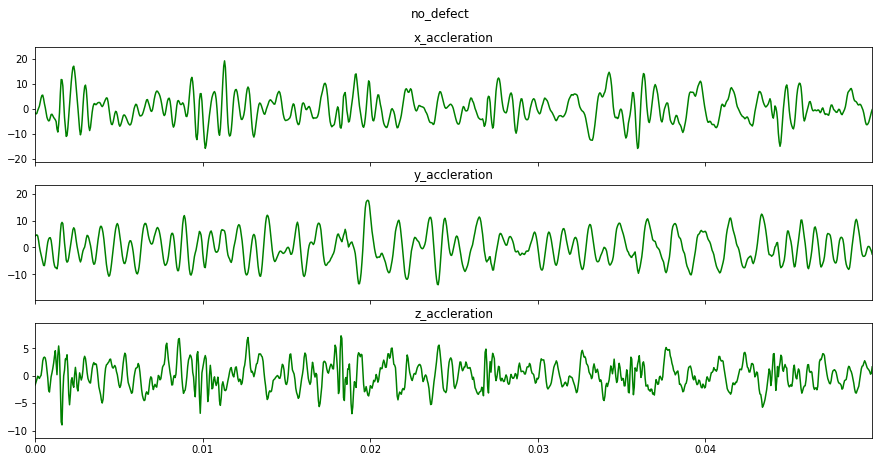

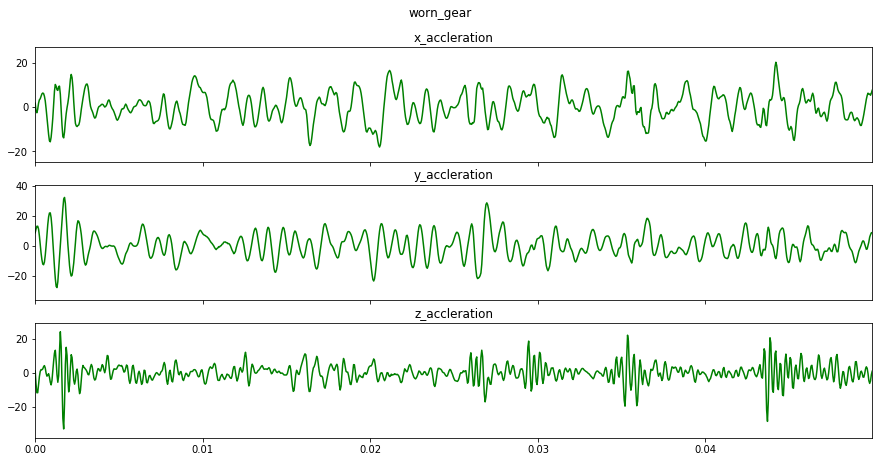

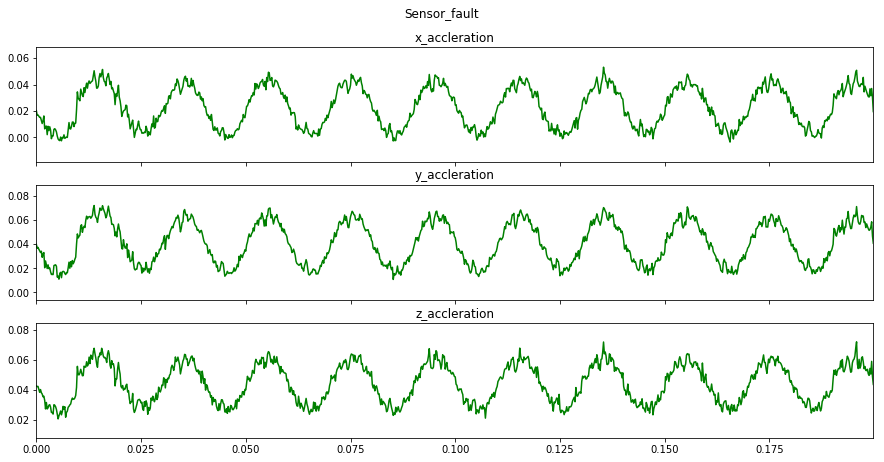

In [26]:
def plot_acceleration(class_name,data):
    
    fig, (ax0,ax1,ax2) = plt.subplots(nrows=3,figsize =(15,7),sharex = True)
    
    plot_axis(ax0,data['time'],data['x_accleration'],'x_accleration')
    plot_axis(ax1,data['time'],data['y_accleration'],'y_accleration')
    plot_axis(ax2,data['time'],data['z_accleration'],'z_accleration')
    plt.subplots_adjust(hspace =0.2)
    fig.suptitle(class_name)
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    
    
def plot_axis(ax,x,y,title):
    ax.plot(x,y,'g')
    ax.set_title(title)
    ax.xaxis.set_visible(True)
    ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
    ax.set_xlim([min(x),max(x)])
    ax.grid(False)
    

for class_name in classes:
    data_for_plot = data[(data['class']==class_name)][:fs*100]
    plot_acceleration(class_name,data_for_plot)
    
    
    
    

In [27]:
data.head(10)

,class,time,x_accleration,y_accleration,z_accleration
0,chipped_tooth,0.00000,4.957847,3.866817,-1.659691
1,chipped_tooth,0.00005,4.532636,3.205644,-1.889678
2,chipped_tooth,0.00010,4.161883,2.596776,-1.206089
3,chipped_tooth,0.00015,4.262070,2.398240,-0.973284
4,chipped_tooth,0.00020,4.081119,1.782129,-0.710336
5,chipped_tooth,0.00025,3.733968,0.826037,-0.201841
6,chipped_tooth,0.00030,3.404273,-0.424235,0.698748
7,chipped_tooth,0.00035,3.435374,-1.557989,1.867185
8,chipped_tooth,0.00040,3.652097,-2.383688,2.675019
9,chipped_tooth,0.00045,3.655293,-2.985312,3.255072


### standardization of data 

In [28]:
from sklearn.preprocessing import StandardScaler
X_data = data[['x_accleration','y_accleration','z_accleration']]
Y_data = data['class']
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
scaled_X = pd.DataFrame(data= X_data,columns=['x_accleration','y_accleration','z_accleration'])
scaled_X['class'] = Y_data.values

In [29]:
scaled_X.groupby('class').count()

,x_accleration,y_accleration,z_accleration
class,,,
Sensor_fault,5000,5000,5000
chipped_tooth,602000,602000,602000
missing_tooth,602000,602000,602000
no_defect,602000,602000,602000
worn_gear,602000,602000,602000


In [30]:
scaled_X.head()

,x_accleration,y_accleration,z_accleration,class
0,0.646295,0.451100,-0.421627,chipped_tooth
1,0.590355,0.372976,-0.478604,chipped_tooth
2,0.541580,0.301033,-0.309251,chipped_tooth
3,0.554760,0.277574,-0.251576,chipped_tooth
4,0.530954,0.204774,-0.186433,chipped_tooth


### Encoding 

In [31]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
scaled_X['label'] = label.fit_transform(scaled_X['class'])

In [32]:
data.head()

,class,time,x_accleration,y_accleration,z_accleration
0,chipped_tooth,0.00000,4.957847,3.866817,-1.659691
1,chipped_tooth,0.00005,4.532636,3.205644,-1.889678
2,chipped_tooth,0.00010,4.161883,2.596776,-1.206089
3,chipped_tooth,0.00015,4.262070,2.398240,-0.973284
4,chipped_tooth,0.00020,4.081119,1.782129,-0.710336


In [33]:
scaled_X.head()

,x_accleration,y_accleration,z_accleration,class,label
0,0.646295,0.451100,-0.421627,chipped_tooth,1
1,0.590355,0.372976,-0.478604,chipped_tooth,1
2,0.541580,0.301033,-0.309251,chipped_tooth,1
3,0.554760,0.277574,-0.251576,chipped_tooth,1
4,0.530954,0.204774,-0.186433,chipped_tooth,1


In [72]:
#le_name_mapping = dict(zip(data['label'], data['label'].transform(data['label'])))
#print(le_name_mapping)
#{'Tom': 0, 'Nick': 1, 'Kate': 2}

In [34]:
data.groupby('class').count()

,time,x_accleration,y_accleration,z_accleration
class,,,,
Sensor_fault,5000,5000,5000,5000
chipped_tooth,602000,602000,602000,602000
missing_tooth,602000,602000,602000,602000
no_defect,602000,602000,602000,602000
worn_gear,602000,602000,602000,602000


### Windows Size or Frame Size

In [35]:
fs = 10
frame_size = fs*10 # 100 data point 
over_lap = 30   # 40 data point overlapp

frame_size_list = [1,2,3,4,5,6, 7,8,9,10]
overlap_list = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]


In [36]:
def get_frame(data,frame_size,over_lap):
    
    No_features = 3
    frames = []
    labels  = []
    for i in range(0,len(data)-frame_size,over_lap):
        
        X = data['x_accleration'].values[i:i+frame_size]
        Y = data['y_accleration'].values[i:i+frame_size]
        Z = data['z_accleration'].values[i:i+frame_size]
        
        label = stats.mode(data['label'][i:i+frame_size])[0][0]
        frames.append([X,Y,Z])
        labels.append(label)
        
        
    frames = np.asarray(frames).reshape(-1,frame_size,No_features)
    
    labels = np.asarray(labels)
    
    return frames , labels

In [37]:
X , Y = get_frame(scaled_X,frame_size,over_lap)

In [38]:
X.shape

(80430, 100, 3)

In [39]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [41]:
X_train.shape , X_test.shape,Y_train.shape,Y_test.shape

((64344, 100, 3), (16086, 100, 3), (64344,), (16086,))

In [42]:
Xtrain = X_train.reshape(64344,300)
#Xtrain = Xtrain.reshape(14477400)
Xtest  = X_test.reshape(16086,300)

In [43]:
Xtrain.shape , Xtest.shape,Y_train.shape,Y_test.shape

((64344, 300), (16086, 300), (64344,), (16086,))

## Model Building

In [44]:
def evaluate_model(trainX, trainy, testX, testy):
    
    model = Sequential()
    model.add(Dense(units=128,activation='relu',input_shape =(300,)))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dense(units=5,activation='softmax'))
    model.summary()
    # Set Optimizer
    opt = adam(lr=0.001, decay=1e-6)
    
    # Compile model
    model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])
    
    # Fit the moodel
    history = model.fit(trainX,trainy,epochs=100,validation_data =(testX,testy),verbose =1)
     # Evaluate the model
    _, accuracy = model.evaluate(testX, testy, verbose=1)
    
    return history,model,accuracy
    
 

In [45]:
history,model ,_ = evaluate_model(Xtrain,Y_train,Xtest,Y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               38528     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 645       
Total params: 72,197
Trainable params: 72,197
Non-trainable params: 0
_________________________________________________________________
Train on 64344 samples, validate on 16086 samples
Epoch 1/100
64344/64344 [==============================] - 15s 240us/step - loss: 0.1704 - acc: 0.9421 - val_loss: 0.0662 - val_acc: 0.9772
Epoch 2/100
64344/64344 [==============================] - 13s 207us/step - loss

64344/64344 [==============================] - 13s 196us/step - loss: 0.0041 - acc: 0.9992 - val_loss: 0.0399 - val_acc: 0.9935
Epoch 53/100
64344/64344 [==============================] - 13s 200us/step - loss: 0.0065 - acc: 0.9986 - val_loss: 0.0389 - val_acc: 0.9937
Epoch 54/100
64344/64344 [==============================] - 13s 203us/step - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0413 - val_acc: 0.9925
Epoch 55/100
64344/64344 [==============================] - 13s 196us/step - loss: 0.0066 - acc: 0.9986 - val_loss: 0.0412 - val_acc: 0.9925
Epoch 56/100
64344/64344 [==============================] - 13s 199us/step - loss: 0.0060 - acc: 0.9987 - val_loss: 0.0416 - val_acc: 0.9933
Epoch 57/100
64344/64344 [==============================] - 13s 197us/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0460 - val_acc: 0.9919
Epoch 58/100
64344/64344 [==============================] - 12s 194us/step - loss: 0.0056 - acc: 0.9986 - val_loss: 0.0256 - val_acc: 0.9947
Epoch 59/100
64344/64344 [

In [46]:
print("accuracy{}".format(_))

accuracy0.9932860872808653


## Plotting  Learning Curve

In [47]:
def plot_learing_curve(history,epochs):
    epoch_range = range(1,epochs+1)
    
    plt.plot(epoch_range,history.history['acc'])
    plt.plot(epoch_range,history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc = 'upper left')
    plt.show()
    
    # plotting training and validation loss 
    
        
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc = 'upper left')
    plt.show()

In [48]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


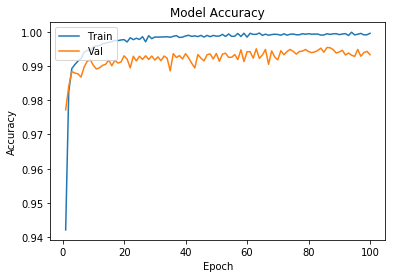

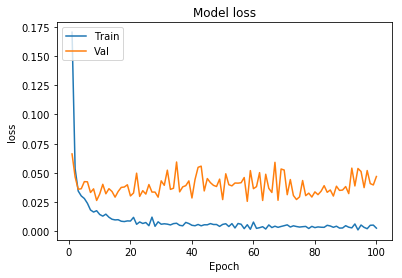

In [49]:
plot_learing_curve(history,100)

In [52]:
Y_pred = model.predict_classes(Xtest)

In [109]:
Y_pred

array([3, 1, 1, ..., 1, 3, 2])

In [54]:
classes_name1 =['Sensor_fault', 'missing_tooth', 'chipped_tooth', 'no_defect',
       'worn_gear']

## Confusion Matrix

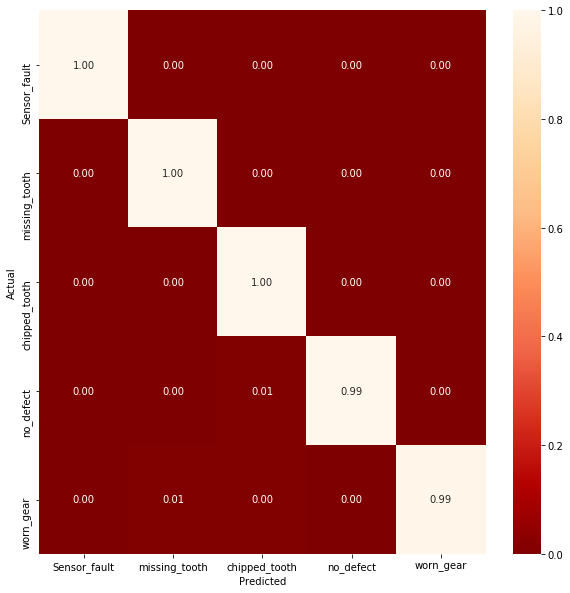

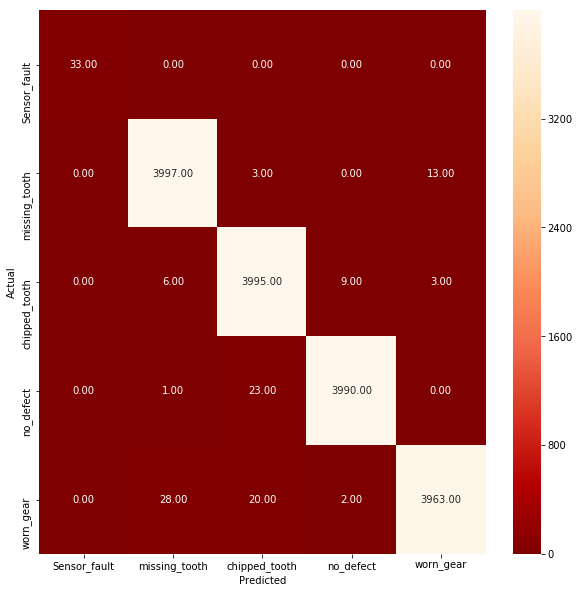

In [56]:
    cm = confusion_matrix(Y_test, Y_pred)
    # Normalise
    cmn = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cmn,cmap="OrRd_r", annot=True, fmt='.2f', xticklabels=classes_name1, yticklabels=classes_name1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm,cmap="OrRd_r", annot=True, fmt='.2f', xticklabels=classes_name1, yticklabels=classes_name1)
    #sns.heatmap(cmn,cmap="YlGnBu", annot=True, fmt='.2f', xticklabels=classes_name, yticklabels=classes_name)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)

In [93]:
# save model and architecture to single file
model.save("15HZ_model_with_sensorFault_final.h5")
print("Saved model to disk")

Saved model to disk


In [87]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model,view = True ,filename="NeuralNetwork15HZ.gv",title="neural network")